In [3]:
!pip install neuralforecast

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.0/235.0 kB 5.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.7/196.7 kB 13.1 MB/s eta 0:00:00


In [62]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load the data
data = pd.read_csv("/kaggle/input/time-series-forecasts-popular-benchmark-datasets/exchange_rate.csv")
data['ds'] = pd.to_datetime(data['date'])
data.drop(columns=['date'], inplace=True)

numeric_columns = data.columns.difference(['ds'])
data[numeric_columns] = MinMaxScaler().fit_transform(data[numeric_columns])

data.head()

,1,2,3,4,5,6,7,8,ds
0,0.488023,0.445104,0.514050,0.103674,0.792386,0.084053,0.408496,0.005351,1990-01-01
1,0.482048,0.443990,0.512794,0.102847,0.792386,0.087651,0.410540,0.000447,1990-01-02
2,0.489961,0.465495,0.512638,0.121012,0.792386,0.103771,0.417286,0.008040,1990-01-03
3,0.488831,0.474075,0.514835,0.123568,0.792386,0.100604,0.416672,0.000000,1990-01-04
4,0.487054,0.491903,0.514678,0.130396,0.792386,0.098733,0.419739,0.011635,1990-01-05


In [63]:
df_melted = data.melt(id_vars=['ds'], var_name='unique_id', value_name='y')
df_melted

,ds,unique_id,y
0,1990-01-01,1,0.488023
1,1990-01-02,1,0.482048
2,1990-01-03,1,0.489961
3,1990-01-04,1,0.488831
4,1990-01-05,1,0.487054
...,...,...,...
60699,2010-10-06,8,0.533590
60700,2010-10-07,8,0.539171
60701,2010-10-08,8,0.542835
60702,2010-10-09,8,0.541290


In [68]:
from neuralforecast import NeuralForecast
from neuralforecast.models import DLinear, NLinear, Informer, Autoformer, PatchTST, FEDformer, VanillaTransformer
from neuralforecast.losses.numpy import mae

horizon = 96
models = [
          DLinear(input_size=96, h=horizon, max_steps = 100, val_check_steps=10, early_stop_patience_steps=3),
          NLinear(input_size=96, h=horizon, max_steps = 100, val_check_steps=10, early_stop_patience_steps=3),
          Informer(h=horizon, input_size=96, max_steps=20, val_check_steps=10, early_stop_patience_steps=3),
          Autoformer(h=horizon, input_size=96, max_steps=20, val_check_steps=10, early_stop_patience_steps=3),
          PatchTST(h=horizon, input_size=96, max_steps=20, val_check_steps=10, early_stop_patience_steps=3),
          VanillaTransformer(h=horizon, input_size=96, max_steps=20, val_check_steps=10, early_stop_patience_steps=3)
          ]
nf = NeuralForecast(models=models, freq='D')

n_time = len(df_melted.ds.unique())
val_size = int(.2 * n_time)
test_size = int(.2 * n_time)

yhat_df = nf.cross_validation(df=df_melted,
                              val_size=val_size,
                              test_size=test_size,
                               n_windows=None)

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

/opt/conda/lib/python3.10/site-packages/neuralforecast/core.py:199: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [69]:
yhat_df

,ds,cutoff,DLinear,NLinear,Informer,Autoformer,PatchTST,VanillaTransformer,y
unique_id,,,,,,,,,
1,2006-08-16,2006-08-15,0.802825,0.949700,0.557187,0.881881,0.875039,0.630726,0.877865
1,2006-08-17,2006-08-15,0.871955,0.876898,0.576757,0.877618,0.871727,0.881517,0.894722
1,2006-08-18,2006-08-15,0.829608,0.970646,0.574329,0.872934,0.875598,0.906013,0.897195
1,2006-08-19,2006-08-15,0.336027,0.903825,0.588239,0.866692,0.872960,0.953991,0.887473
1,2006-08-20,2006-08-15,0.888188,0.924278,0.612790,0.870361,0.879250,1.004513,0.888180
...,...,...,...,...,...,...,...,...,...
8,2010-10-06,2010-07-06,0.635095,0.688752,0.537158,0.674349,0.685988,0.750230,0.533590
8,2010-10-07,2010-07-06,0.019766,0.719728,0.521448,0.579668,0.687636,0.781909,0.539171
8,2010-10-08,2010-07-06,0.484762,0.612375,0.542996,0.613517,0.687603,0.775381,0.542835


In [70]:
print('DLinear' ,mae(yhat_df['y'].values, yhat_df['DLinear'].values))
print('NLinear', mae(yhat_df['y'].values, yhat_df['NLinear'].values))
print('Informer', mae(yhat_df['y'].values, yhat_df['Informer'].values))
print('Autoformer', mae(yhat_df['y'].values, yhat_df['Autoformer'].values))
print('PAtchTST', mae(yhat_df['y'].values, yhat_df['PatchTST'].values))
print('Vanilla Trans', mae(yhat_df['y'].values, yhat_df['VanillaTransformer'].values))

DLinear 0.17395466615534125
NLinear 0.05990319593893343
Informer 0.15511928410328707
Autoformer 0.06530628476301335
PAtchTST 0.034788284864681926
Vanilla Trans 0.15011628900853946


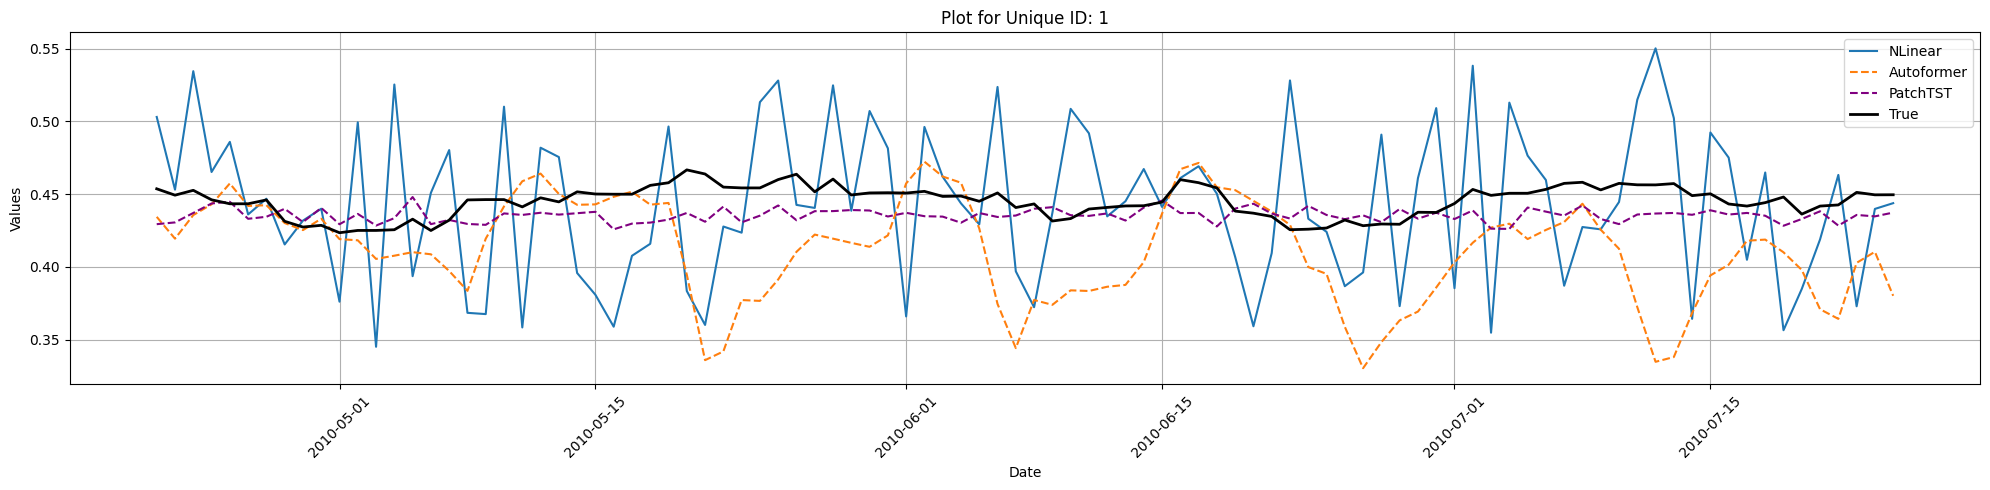

In [82]:
import matplotlib.pyplot as plt
# Specify the unique_id to plot
unique_id_to_plot = '1' 

# Filter the DataFrame for the specific unique_id
Y_plot = yhat_df.loc[unique_id_to_plot]


cutoffs = yhat_df['cutoff'].unique()[::horizon]  
Y_plot = Y_plot[Y_plot['cutoff'].isin(cutoffs)]

# Plot the data
plt.figure(figsize=(20, 5))
#plt.plot(Y_plot['ds'][-96:], Y_plot['DLinear'][-96:], linestyle='-', label='DLinear')
plt.plot(Y_plot['ds'][-96:], Y_plot['NLinear'][-96:], linestyle='-', label='NLinear')
#plt.plot(Y_plot['ds'][-96:], Y_plot['Informer'][-96:], linestyle='--', label='Informer')
plt.plot(Y_plot['ds'][-96:], Y_plot['Autoformer'][-96:], linestyle='--', label='Autoformer')
plt.plot(Y_plot['ds'][-96:], Y_plot['PatchTST'][-96:], linestyle='--', label='PatchTST', color = 'purple')
#plt.plot(Y_plot['ds'][-96:], Y_plot['VanillaTransformer'][-96:], linestyle='--', label='VanillaTransformer', color =  'yellow')
plt.plot(Y_plot['ds'][-96:], Y_plot['y'][-96:], label='True', color = 'black', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Values')
plt.title(f'Plot for Unique ID: {unique_id_to_plot}')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)  
plt.tight_layout()
plt.savefig(f'Exchange-{unique_id_to_plot}.png')
plt.show()